In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections

In [5]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')
df2 = pd.read_csv('validation.csv')

In [3]:
df = df.drop(['bidid','userid','slotid','IP','creative','keypage', 'domain','url','urlid'], axis = 1)

### 每个advertiser 每天的平均点击率

In [6]:
df_weekday = df['click'].groupby([df['advertiser'],df['weekday']])
a = df_weekday.mean().unstack()
a = a.fillna(0)
a

weekday,0,1,2,3,4,5,6
advertiser,,,,,,,
1458,0.000681,0.000951,0.000706,0.000755,0.000887,0.000866,0.000645
2259,0.000365,0.000333,0.000000,0.000000,0.000000,0.000273,0.000321
2261,0.000000,0.000000,0.000000,0.000322,0.000297,0.000354,0.000340
2821,0.000700,0.000559,0.000511,0.000000,0.000000,0.000000,0.000000
2997,0.000000,0.000000,0.010476,0.003179,0.002769,0.003204,0.000000
3358,0.000746,0.000599,0.000266,0.001027,0.000758,0.000750,0.000694
3386,0.000748,0.000719,0.000744,0.000683,0.000729,0.000830,0.000487
3427,0.000578,0.000609,0.000725,0.000736,0.000603,0.000653,0.000803
3476,0.000548,0.000759,0.000723,0.000477,0.000753,0.000271,0.000481


In [7]:
b = a.loc[[1458]].T
c = a.loc[[2259]].T
d = a.loc[[2261]].T
e = a.loc[[2821]].T
f = a.loc[[2997]].T
g = a.loc[[3358]].T
h = a.loc[[3386]].T
i = a.loc[[3427]].T
j = a.loc[[3476]].T

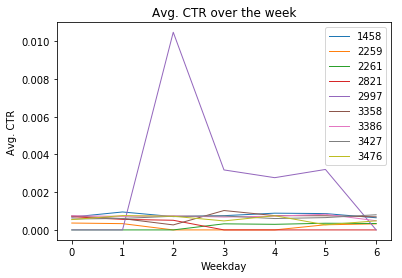

In [8]:
index = np.arange(len(b))

plt.plot(index, b[1458], marker='', linewidth=1)
plt.plot(index, c[2259], marker='', linewidth=1)
plt.plot(index, d[2261], marker='', linewidth=1)
plt.plot(index, e[2821], marker='', linewidth=1)
plt.plot(index, f[2997], marker='', linewidth=1)
plt.plot(index, g[3358], marker='', linewidth=1)
plt.plot(index, h[3386], marker='', linewidth=1)
plt.plot(index, i[3427], marker='', linewidth=1)
plt.plot(index, j[3476], marker='', linewidth=1)
plt.xlabel('Weekday', fontsize=10)
plt.ylabel('Avg. CTR', fontsize=10)
plt.title('Avg. CTR over the week')
plt.legend()

In [11]:
df['advertiser'].value_counts()

1458    492353
3386    455041
3427    402806
3476    310835
3358    264956
2821    211366
2259    133673
2261    110122
2997     49829
Name: advertiser, dtype: int64

In [24]:
df['bidprice'].value_counts()

300    947394
294    322009
238    313445
227    235767
241    204893
277    182981
254    118845
249    105647
Name: bidprice, dtype: int64

In [73]:
df1 = df['click']

In [74]:
df2 = df['bidprice']

In [81]:
df3 = pd.concat([df1,df2],axis = 1)

In [98]:
click300 = df3.loc[df['click'] == 1].loc[df3['bidprice'] == 300]
click297 = df3.loc[df['click'] == 1].loc[df3['bidprice'] == 297]
click238 = df3.loc[df['click'] == 1].loc[df3['bidprice'] == 238]
click227 = df3.loc[df['click'] == 1].loc[df3['bidprice'] == 227]
click241 = df3.loc[df['click'] == 1].loc[df3['bidprice'] == 241]
click277 = df3.loc[df['click'] == 1].loc[df3['bidprice'] == 277]
click254 = df3.loc[df['click'] == 1].loc[df3['bidprice'] == 254]
click249 = df3.loc[df['click'] == 1].loc[df3['bidprice'] == 249]

### the amount of clicks each bid price have

In [99]:
print(len(click300))
print(len(click297))
print(len(click238))
print(len(click227))
print(len(click241))
print(len(click277))
print(len(click254))
print(len(click249))

705
0
161
219
144
265
103
34


In [100]:
df4 = df['payprice']
df5 = pd.concat([df1,df4],axis = 1)

In [103]:
df5['payprice'].value_counts()

70     141942
50     109782
20     108131
77      77936
80      69089
55      62668
5       45131
31      43491
88      41174
52      40326
73      40005
22      36707
84      30421
21      30269
30      26681
76      22810
160     21419
10      21235
40      19969
51      19556
89      19349
17      19275
101     18065
18      17904
60      17716
16      17635
33      17379
11      16934
59      16086
42      15984
        ...  
257       643
272       643
239       624
267       616
254       616
264       615
245       615
292       608
276       600
249       598
288       574
269       573
277       572
263       561
291       546
284       530
282       523
0         487
287       479
273       472
295       467
278       459
290       457
285       445
294       424
279       404
299       290
298       276
296       239
297       171
Name: payprice, Length: 301, dtype: int64

In [104]:
pay_click = df5.loc[df['click'] == 1]

In [127]:
pay_click['payprice'].value_counts()
sort = np.sort(pay_click["payprice"])
sort1 = pd.Series(sort[:700])

### Basic statistics

In [10]:
Adv_group=df.groupby(df['advertiser'])
Clicks = Adv_group['click'].sum()
#Clicks
Imps = Adv_group['click'].count()
#Imps
Cost =  Adv_group['payprice'].sum()/1000
#Cost: the unit is fen/one impression, bidprice or payprice is fen oer 1000 impressions
CTR = Clicks/Imps
#CTR
CPM = Cost/Imps
CPM = CPM*1000
#CPM: cost per mille people, so *1000
eCPC = Cost/Clicks
#eCPC
Train_summ = pd.DataFrame({'Imps':Imps, 'Clicks':Clicks, 'Cost':Cost, 'CTR':CTR, 'CPM':CPM, 'eCPC':eCPC})
Train_summ

,CPM,CTR,Clicks,Cost,Imps,eCPC
advertiser,,,,,,
1458,68.992646,0.000782,385,33968.736,492353,88.230483
2259,92.974931,0.000322,43,12428.238,133673,289.028791
2261,89.662184,0.000327,36,9873.779,110122,274.271639
2821,89.077922,0.000620,131,18828.044,211366,143.725527
2997,62.800116,0.004355,217,3129.267,49829,14.420585
3358,84.720599,0.000762,202,22447.231,264956,111.124906
3386,76.766320,0.000703,320,34931.823,455041,109.161947
3427,75.616329,0.000675,272,30458.711,402806,111.980555
3476,76.950083,0.000602,187,23918.779,310835,127.907909


In [17]:
print(np.mean(Train_summ.CPM))
print(np.mean(Train_summ.CTR))
print(np.sum(Train_summ.Clicks))
print(np.mean(Train_summ.Cost))
print(np.sum(Train_summ.Imps))
print(np.mean(Train_summ.eCPC))

79.72901437708572
0.0010164126850118298
1793
21109.40088888889
2430981
141.09470463644686


In [8]:
Adv_group=df2.groupby(df['advertiser'])
Clicks = Adv_group['click'].sum()
#Clicks
Imps = Adv_group['click'].count()
#Imps
Cost =  Adv_group['payprice'].sum()/1000
#Cost: the unit is fen/one impression, bidprice or payprice is fen oer 1000 impressions
CTR = Clicks/Imps
#CTR
CPM = Cost/Imps
CPM = CPM*1000
#CPM: cost per mille people, so *1000
eCPC = Cost/Clicks
#eCPC
Train_summ1 = pd.DataFrame({'Imps':Imps, 'Clicks':Clicks, 'Cost':Cost, 'CTR':CTR, 'CPM':CPM, 'eCPC':eCPC})
Train_summ1

,CPM,CTR,Clicks,Cost,Imps,eCPC
advertiser,,,,,,
1458,78.440328,0.000653,40,4808.549,61302,120.213725
2259,78.025149,0.000660,11,1299.977,16661,118.179727
2261,77.741875,0.000717,10,1083.644,13939,108.364400
2821,78.893166,0.000794,21,2086.172,26443,99.341524
2997,77.818483,0.000474,3,492.591,6330,164.197000
3358,78.712605,0.000750,25,2623.255,33327,104.930200
3386,77.823944,0.000634,36,4420.400,56800,122.788889
3427,78.157414,0.000713,36,3947.731,50510,109.659194
3476,78.081242,0.000518,20,3014.951,38613,150.747550


In [18]:
print(np.mean(Train_summ1.CPM))
print(np.mean(Train_summ1.CTR))
print(np.sum(Train_summ1.Clicks))
print(np.mean(Train_summ1.Cost))
print(np.sum(Train_summ1.Imps))
print(np.mean(Train_summ1.eCPC))

78.18824526893674
0.0006569859731392388
202
2641.9188888888893
303925
122.04691215728715


In [16]:
len(df1)

303375

In [19]:
train_X = df.drop(['click','bidprice', 'payprice'], axis=1)
train_y = df[['click','bidprice', 'payprice']].copy()

valid_X = df2.drop(['click','bidprice', 'payprice'], axis=1)
valid_y = df2[['click','bidprice', 'payprice']].copy()